In [21]:
# Die ersten beiden Zellen beheben mögliche Formatierungsfehler im Textdocument
# Zuerst werden die Zeilen in eine Liste geschrieben
store = []
filename1 = "test7.txt"
with open(filename1,"r") as file:
    for line in file:
        store.append(line)



In [22]:
# dann werden die Daten in der richtigen Formatierung wieder in ein Textdocument geschrieben.
# das musste ich machen, da einige Zeilen fehlerhaft 4 Spalten hatten
filename2 = "test7b.txt"
with open(filename2,"w") as file:
    for line in store:
        sp = line.split()
        if len(sp)==3:
            file.write(f"{sp[0]}\t{sp[1]}\t{sp[2]}\n")

In [29]:
print(store[0].split())

['119', '167', '546']


In [1]:
# Da ich die Messungen in mehreren (3) Durchgängen zusammengestellt habe, und diese Messungen lange dauerten und ich sie nicht wiederholen wollte.
# muss ich die Messdaten in den folgenden 3 Zellen in die richtigen arrays zusammenstückeln.
# Die nächsten 3 Zellen erzeugen ein Array mit der endgültigen Messung der einzelnen z.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("test6b.txt",header= None,sep='\t')
n_z = 5
n_m = int(np.shape(data)[0]/n_z)
data = data.to_numpy()
dat = np.zeros((n_m,n_z,3))
for i in range(n_z):
    dat[:,i,:]= data[i*n_m:(i+1)*n_m,:]
data1 = data[:int(np.shape(data)[0]/3),:]
data2 = data[int(np.shape(data)[0]/3):int(np.shape(data)[0]/3)*2,:]
data3 = data[2*int(np.shape(data)[0]/3):,:]
T = data.shape[0]/n_z



In [2]:
np.max(dat[:,0,0]+dat[:,0,1])
data = pd.read_csv("test7b.txt",header= None,sep='\t')

n_m = int(T)
data = data.to_numpy()


dat[:,3,:]= data[:n_m,:]
dat[:,4,:] = data[-n_m:,:]

In [3]:

data = pd.read_csv("test5b.txt",header= None,sep='\t')
n_m = int(T)
data = data.to_numpy()
print(np.shape(data))
print(n_m)
total = np.zeros((np.shape(dat)[0],8,3))
n_iter = int(np.shape(data)[0]/3)
for i in range(3):
    total[:,i,:]=dat[:,i,:]
for i in range(3,5):
    total[:,i+3,:]=dat[:,i,:]
for n in range(3):
    total[:,3+n,:]=data[n*(n_iter+1):n*(n_iter+1)+n_m,:]

with open("tot.txt","w") as file:
    for i in range(8):
        for n in range(np.shape(total)[0]):
            for j in range(3):
                if (j==2):
                    file.write(f"{total[n,i,j]}\n")
                else:
                    file.write(f"{total[n,i,j]}\t")

(6601083, 3)
1100501


In [41]:
# in dieser Zelle werden die Daten zur Bestimmung der Thermalisierungszeit gelesen.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("test4b.txt",header= None,sep='\t')
n_z = 3
n_m = int(np.shape(data)[0]/n_z)
data = data.to_numpy()
dat = np.zeros((n_m,n_z,3))
for i in range(n_z):
    dat[:,i,:]= data[i*n_m:(i+1)*n_m,:]
data1 = data[:int(np.shape(data)[0]/3),:]
data2 = data[int(np.shape(data)[0]/3):int(np.shape(data)[0]/3)*2,:]
data3 = data[2*int(np.shape(data)[0]/3):,:]
T = data.shape[0]/n_z

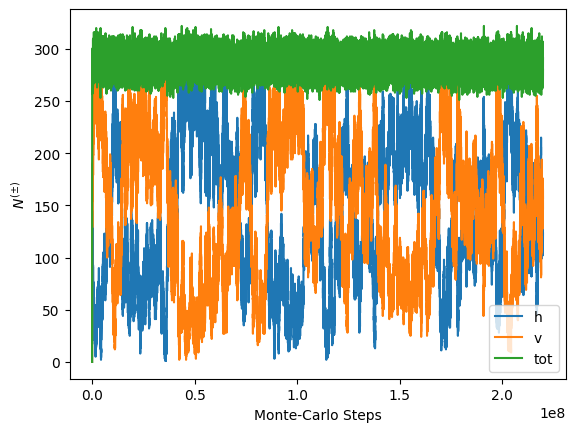

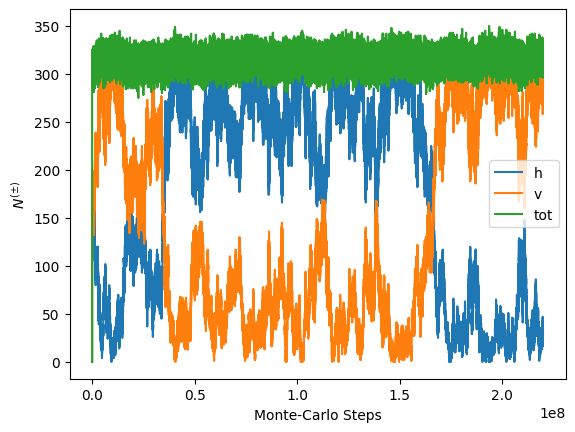

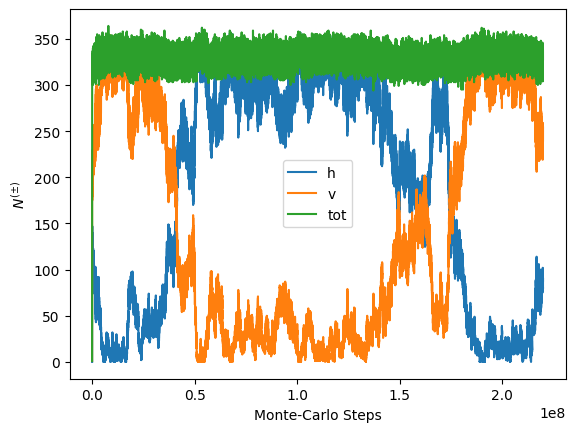

In [42]:
# Thermalisierungsdaten weden geplottet

# Menge der aufgezeichneten Schritte pro z
T=int(T)
# Anteil der Daten (1 alles, 0.5 nur die erste Hälfte, usw.)
p = 1
# Es müssen nicht alle Punkte geplottet werden sondern nur jeder b.
b =1000
# x-Achse
t = np.arange(T)
# für jedes z wird Anzahl horizontaler (h), vertikaler (v) Stäbchen und Gesamtzahl der Stäbchen geplottet.
for i in range(3):
    fig, ax = plt.subplots(1,1)
    ax.plot(t[0:int(p*T):b],data[i*T:i*T+int(p*T):b,1])
    ax.plot(t[0:int(p*T):b],data[i*T:i*T+int(p*T):b,0])
    # ax.plot(t[0:int(p*T):b],data[i*T:i*T+int(p*T):b,2])
    ax.plot(t[0:int(p*T):b],data[i*T:i*T+int(p*T):b,1]+data[i*T:i*T+int(p*T):b,0])
    # ax.plot(np.arange(np.shape(data)[0]/b),data[::b,0])
    ax.legend(["h","v","tot"])
    ax.set_xlabel("Monte-Carlo Steps")
    ax.set_ylabel(r"$N^{(\pm)}$")
    
plt.show()

In [4]:
# Funktion zum Ersetzen von nan-Werten
def nan_fill(arr):
    
    out = arr.copy()
    for row_idx in range(out.shape[0]):
        for col_idx in range(1, out.shape[1]):
            if np.isnan(out[row_idx, col_idx]):
                out[row_idx, col_idx] = out[row_idx, col_idx - 1]
    return out

In [5]:
# Ordnungsparameter array s wird definiert einmal mit Thermalisierungszeit 20 000 (s1, b=1) und einmal für Thermalisierungszeit 40 000 (s, b=2)
p = 1
b = 1
l = int(p*T/b)
s1 = np.zeros((l,8))
t =T
for i in range(8):
    s1[:,i]=(total[:int(p*t):b,i,1]-total[:int(p*t):b,i,0])/(total[:int(p*t):b,i,1]+total[:int(p*t):b,i,0])
s1 = nan_fill(s1) 
p = 1
b = 2
l = int(p*T/b)
s = np.zeros((l+1,8))
t =T
for i in range(8):
    s[:,i]=(total[:int(p*t):b,i,1]-total[:int(p*t):b,i,0])/(total[:int(p*t):b,i,1]+total[:int(p*t):b,i,0])
    
N_p = np.zeros((l+1,8))
t =T
for i in range(8):
    N_p[:,i]=(total[:int(p*t):b,i,1]+total[:int(p*t):b,i,0])
    
s = nan_fill(s)   


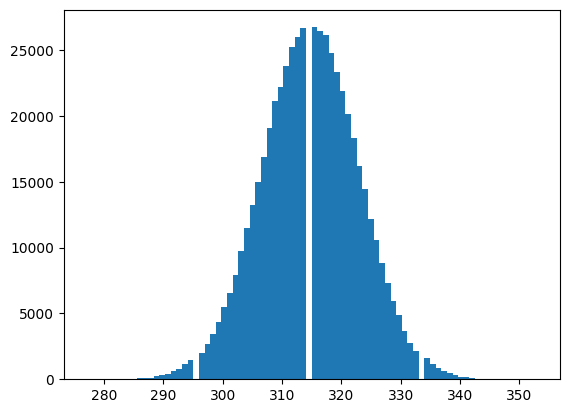

[313. 324. 304. 305. 314. 321. 321. 305. 315. 320. 306. 307. 311. 323.]


In [7]:
# Array mit Gesamtzahl der Stäbchen wird definiert und Mittelwert und Fehler werden berechnet
N_p = np.zeros((l+1,8))
t =T
for i in range(8):
    N_p[:,i]=(total[:int(p*t):b,i,1]+total[:int(p*t):b,i,0])
N_mean = np.mean(np.abs(N_p),axis=0)
N_std = np.std(np.abs(N_p),axis=0)
N_sem = N_std/np.sqrt(T)
fig, ax = plt.subplots(1,1)
ax.hist(N_p[:,4],bins=80)
plt.show()
print(N_p[1:15,4])

[[1.23283985e-01 1.46943299e-01 1.87909178e-01 3.75781579e-01
  6.47635117e-01 8.27740670e-01 8.43840351e-01 9.22643076e-01]
 [9.22628988e-02 1.09157932e-01 1.38099277e-01 2.35280411e-01
  2.57456151e-01 1.73702214e-01 1.66426404e-01 9.12100333e-02]
 [8.79491643e-05 1.04054273e-04 1.31642471e-04 2.24279919e-04
  2.45418837e-04 1.65580799e-04 1.58645168e-04 8.69455253e-05]
 [1.21259049e+02 1.78795446e+02 2.29550405e+02 2.86939811e+02
  3.14713458e+02 3.31947211e+02 3.34523948e+02 3.48766254e+02]
 [7.52248956e+00 8.42821436e+00 1.03837091e+01 8.28082912e+00
  8.19392111e+00 7.68138289e+00 7.59531211e+00 7.00955014e+00]
 [7.17077697e-03 8.03415478e-03 9.89822069e-03 7.89366051e-03
  7.81081586e-03 7.32224128e-03 7.24019471e-03 6.68181994e-03]]
(6, 8)


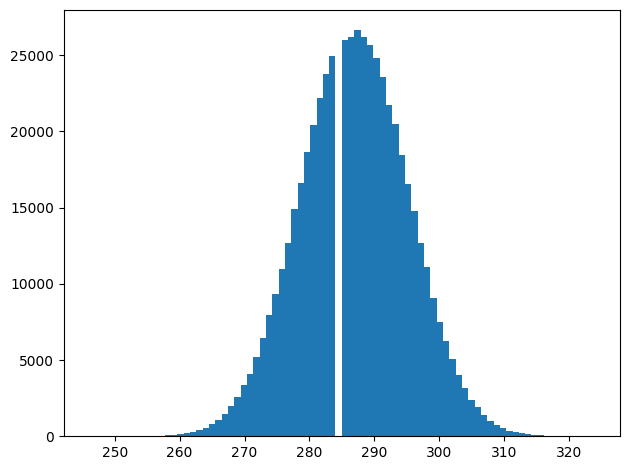

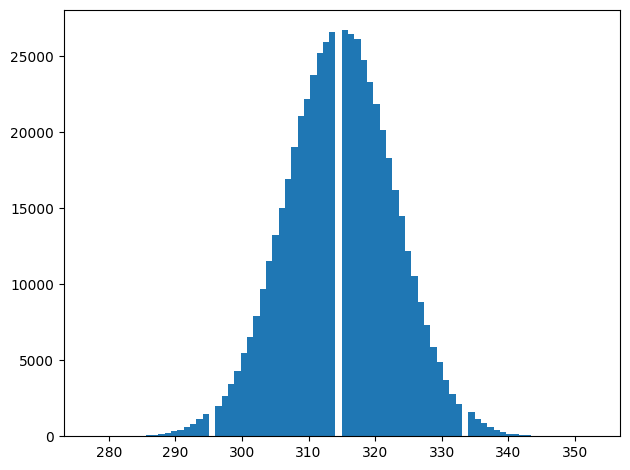

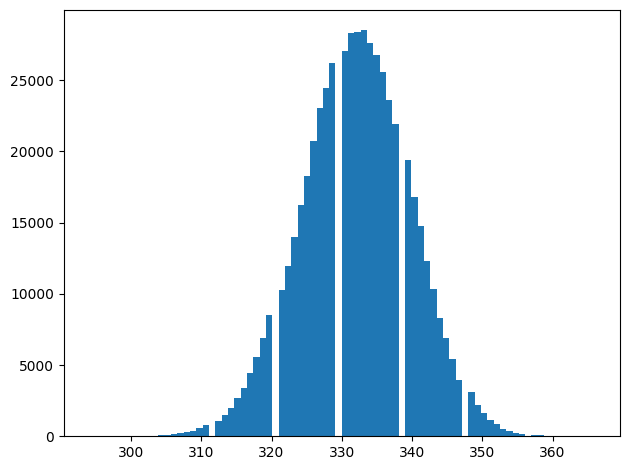

In [8]:
    
# Mittelwert und Fehler des Ordnungsparameters werden berechnet und zusammen mit den Werten für die Gesamtzahl der Stächen in "s_eva" geschrieben.
# Außerdem werden die histogramme für s gezeichnet.
s_mean = np.mean(np.abs(s),axis=0)
s_std = np.std(np.abs(s),axis=0)
s_sem = s_std/np.sqrt(T)
s_eva = np.array([s_mean,s_std,s_sem,N_mean,N_std,N_sem])
print(s_eva)
print(np.shape(s_eva))
for n in range(3,6):
    fig, ax = plt.subplots(1,1, tight_layout=True)
    ax.hist((total[::2,n,1]+total[::2,n,0]), bins = 80)
    # ax[1].hist(s1[:,n], bins = 80)
    
    plt.show()


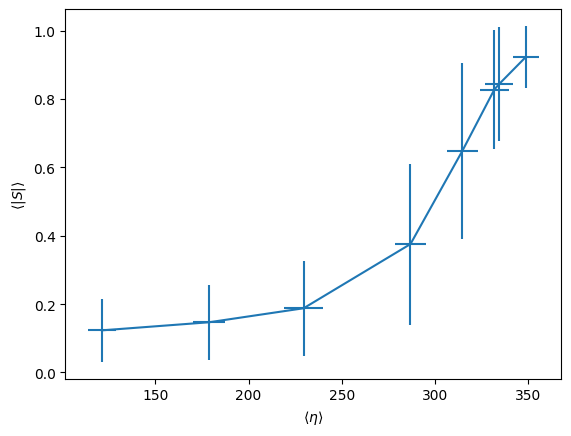

In [43]:
# Phasendiagramm wird gezeichnet
fig, ax = plt.subplots(1,1)
ax.errorbar(s_eva[3,:],s_eva[0,:],yerr=(s_eva[1,:]+s_eva[2,:]),xerr=(s_eva[4,:]+s_eva[5,:]))
ax.set_xlabel(r"$\langle\eta\rangle$")
ax.set_ylabel(r"$\langle{|S|}\rangle$")
plt.show()

In [9]:
for i in range(8):
    print(s_eva[:,i])

[1.23283985e-01 9.22628988e-02 8.79491643e-05 1.21259049e+02
 7.52248956e+00 7.17077697e-03]
[1.46943299e-01 1.09157932e-01 1.04054273e-04 1.78795446e+02
 8.42821436e+00 8.03415478e-03]
[1.87909178e-01 1.38099277e-01 1.31642471e-04 2.29550405e+02
 1.03837091e+01 9.89822069e-03]
[3.75781579e-01 2.35280411e-01 2.24279919e-04 2.86939811e+02
 8.28082912e+00 7.89366051e-03]
[6.47635117e-01 2.57456151e-01 2.45418837e-04 3.14713458e+02
 8.19392111e+00 7.81081586e-03]
[8.27740670e-01 1.73702214e-01 1.65580799e-04 3.31947211e+02
 7.68138289e+00 7.32224128e-03]
[8.43840351e-01 1.66426404e-01 1.58645168e-04 3.34523948e+02
 7.59531211e+00 7.24019471e-03]
[9.22643076e-01 9.12100333e-02 8.69455253e-05 3.48766254e+02
 7.00955014e+00 6.68181994e-03]
